# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

*Notes:* 

- Solve the questions with python.

- Round the final answer to three decimal places.

In [5]:

from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import math
import random

## Bernoulli's Distribution

In a basket containing 100 fruits, there are 60 apples and 40 oranges. 

A fruit is picked randomly from the basket. 

1. **What is the probability that the fruit is apple?**
1. **What is the probability that it is an orange?**

In [3]:
"""
Calculate:
p = probability that the fruit is an apple 
q = probability that the fruit is an orange
"""
apple_count = 60
orange_count = 40

total_fruits = apple_count + orange_count


prop_of_being_an_apple = apple_count / total_fruits
prop_of_being_an_orange = orange_count / total_fruits
print(f"prop_of_being_an_apple: {prop_of_being_an_apple}")
print(f"prop_of_being_an_orange: {prop_of_being_an_orange}")

prop_of_being_an_apple: 0.6
prop_of_being_an_orange: 0.4


Now we take a random sample of 20 fruits from the basket. After each fruit is taken, a new fruit of the same type is replaced in the basket. Therefore, every time we are taking 1 fruit from 100 fruits. 

1. **What is the probability that the first 5 fruits are all apples?**

1. **What is the probability that the first 5 fruits are all apples and the next 15 fruits are all oranges?**

You can include the `p` and `q` probabilities you previous calculated in your solution.

In [13]:
# The chance of picking an apple on any single draw
chance_of_apple = 0.6

# The chance of picking an orange on any single draw
chance_of_orange = 0.4

# Probability that the first 5 picks are all apples:
# This is 0.6 × 0.6 × 0.6 × 0.6 × 0.6
prob_5_apples = chance_of_apple ** 5

# Probability that the first 5 are apples AND the next 15 are oranges:
# This is: prob of 5 apples × prob of 15 oranges
prob_5_apples_15_oranges = prob_5_apples * (chance_of_orange ** 15)

# Show results
print(f"Probability the first 5 fruits are apples: {prob_5_apples:.6f}")
print(f"Probability first 5 are apples and next 15 are oranges: {prob_5_apples_15_oranges:.10f}")


Probability the first 5 fruits are apples: 0.077760
Probability first 5 are apples and next 15 are oranges: 0.0000000835


## Binomial Distribution

Similar to the above problem, this time again we randomly sample 20 fruits.

**What is the probability that this time the sample contains 5 apples and 15 oranges?**

Please note that this time the order of the fruits being picked does not matter.

In [18]:
# Parameters
number_of_draws = 20
number_of_successes = 5
probability_of_successes_per_trial = prop_of_being_an_apple
probability_of_failure_per_trial = 1 - probability_of_successes_per_trial

# Calculate the binomial coefficient: C(n, k)
binomial_coefficient = math.comb(number_of_draws, number_of_successes)
print(binomial_coefficient)
# Calculate binomial probability
binomial_probability = (
    binomial_coefficient
    * (probability_of_successes_per_trial ** number_of_successes)
    * (probability_of_failure_per_trial ** (number_of_draws - number_of_successes))
)

print(f"Probability of exactly 5 apples in 20 picks (any order): {binomial_probability:.6f}")

15504
Probability of exactly 5 apples in 20 picks (any order): 0.001294


In the lesson we also discussed CDF (cumulative distribution function). In the context of the above problem, **what is the probability that less than 5 fruits picked are apples?**

Write the formula and calculate the probability below.

In [19]:

# Sum probabilities for k = 0 to 4
cdf_less_than_5 = sum(
    math.comb(number_of_draws, k) * (prop_of_being_an_apple ** k) * ((1 - prop_of_being_an_apple) ** (number_of_draws - k))
    for k in range(5)
)

print(f"Probability of fewer than 5 apples: {cdf_less_than_5:.6f}")

Probability of fewer than 5 apples: 0.000317


**Plot the PDF (probability distributiom function) for the above binomial distribution.**

*Hint: The range of x in a binomial distribution is from `0` to `n`.*

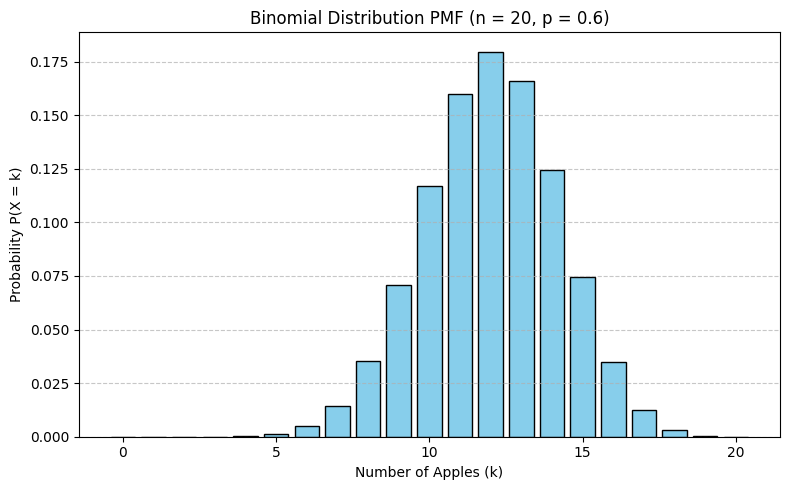

In [20]:
# your code here
# Please label the axes and give a title to the plot 
x = np.arange(0, number_of_draws + 1)
pdf = stats.binom.pmf(x, number_of_draws, prop_of_being_an_apple)

plt.figure(figsize=(8, 5))
plt.bar(x, pdf, color='skyblue', edgecolor='black')
plt.xlabel('Number of Apples (k)')
plt.ylabel('Probability P(X = k)')
plt.title(f'Binomial Distribution PMF (n = {number_of_draws}, p = {prop_of_being_an_apple})')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Poisson Distribution

In this challenge you are required to use the Math library in python to solve the problems.

In the UEFA champions league tournament, the average number of goals scored in a match is 2.3. 

**What is the probability that the number of goals scored in a match is 5?**

*Hint: Use the exp() in the math library*

And to calculate the factorial, you can use the following code:

```python
import math
math.factorial(n) # n is the number you want to find the factorial of
```

In [23]:
# Gebruik de math-bibliotheek voor wiskundige functies zoals exp() en factorial
import math

# Gemiddeld aantal doelpunten per wedstrijd (λ)
# Dit is de lambda-waarde in de Poisson-verdeling
lambda_waarde = 2.3

# Aantal doelpunten waarvoor we de kans willen berekenen (k)
k = 5

# Bereken e tot de macht -λ: dit geeft de kans op géén doelpunten, 
# een basiscomponent van de Poisson-formule
exponent = math.exp(-lambda_waarde)

# Bereken λ tot de macht k: hoe sterk draagt het gemiddelde bij aan precies k doelpunten
macht = lambda_waarde ** k

# Bereken de faculteit van k (k!): het aantal manieren waarop k gebeurtenissen kunnen plaatsvinden
faculteit = math.factorial(k)

# Pas de volledige Poisson-formule toe:
# P(k; λ) = (e^(-λ) * λ^k) / k!
poisson_kans = (exponent * macht) / faculteit

# Toon het resultaat met 6 decimalen
print(f"Kans op precies {k} doelpunten bij gemiddeld {lambda_waarde} doelpunten: {poisson_kans:.6f}")


Kans op precies 5 doelpunten bij gemiddeld 2.3 doelpunten: 0.053775


**Draw a poisson probability distribution plot for the number of goals to be between 0 to 10.**

In [ ]:
# your code here
# Please label the axes and give a title to the plot 